<a href="https://colab.research.google.com/github/airoud/Predicting-Compressive-Strengh-of-Concrete/blob/main/Predicting_Compressive_Strengh_of_Concrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
df = pd.read_csv('compresive_strength_concrete.csv')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)' : 'cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' : 'slag',
       'Fly Ash (component 3)(kg in a m^3 mixture)' :'ash',
       'Water  (component 4)(kg in a m^3 mixture)' :'water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplastic',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' :'coarseagg',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)' :'fineagg', 
       'Age (day)':'age',
       'Concrete compressive strength(MPa, megapascals) ':'strengh'})

In [6]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strengh'],
      dtype='object')

In [7]:
df.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strengh
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strengh         float64
dtype: object

In [9]:
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strengh         0
dtype: int64

In [10]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strengh
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Exploratory Data Analysis

### Univariate Analysis

**Cement**

In [11]:
from scipy import stats

q1=df['cement'].quantile(q=0.25)
q3=df['cement'].quantile(q=0.75)
print('1st Quarile (Q1) is', q1)
print('3rd Quarile (Q3) is', q3)
print('Interquatile range (IQR) is', stats.iqr(df['cement']))


1st Quarile (Q1) is 192.375
3rd Quarile (Q3) is 350.0
Interquatile range (IQR) is 157.625


In [12]:
# Outlier detection from Interquatile Range (IQR) in original data

L_outliers = q1-1.5*(q3-q1)
U_outliers = q3+1.5*(q3-q1)
print('Lower outliers limit in cement', L_outliers)
print('Upper outliers limit in cement', U_outliers)


Lower outliers limit in cement -44.0625
Upper outliers limit in cement 586.4375


In [13]:
# Checking for presence of outliers with the upper and lower limits

print('Number of outliers in cement upper', df[df['cement']>U_outliers]['cement'].count())
print('Number of outliers in cement upper', df[df['cement']<L_outliers]['cement'].count())
print('% of outlier in cement upper', round(df[df['cement']>U_outliers]['cement'].count()*100/len(df)))
print('% of outlier in cement lower', round(df[df['cement']<L_outliers]['cement'].count()*100/len(df)))




Number of outliers in cement upper 0
Number of outliers in cement upper 0
% of outlier in cement upper 0
% of outlier in cement lower 0


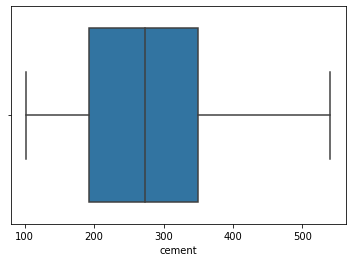

In [14]:
# Distribution of cement

sns.boxplot(x='cement', data=df);

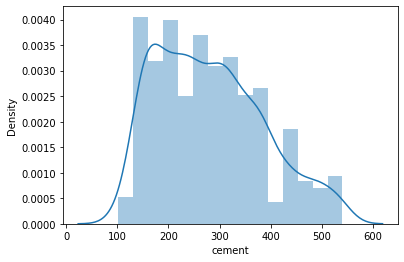

In [15]:
# distplot of cement
sns.distplot(df['cement']);
plt.show()

**Water**

In [16]:
w_q1=df['water'].quantile(q=0.25)
w_q3=df['water'].quantile(q=0.75)
print('1st Quarile (Q1) is', w_q1)
print('3rd Quarile (Q3) is', w_q3)
print('Interquatile range (IQR) is', stats.iqr(df['water']))


1st Quarile (Q1) is 164.9
3rd Quarile (Q3) is 192.0
Interquatile range (IQR) is 27.099999999999994


In [17]:
# Outlier detection from Interquatile Range (IQR) in original data

WL_outliers = w_q1-1.5*(w_q3-w_q1)
WU_outliers = w_q3+1.5*(w_q3-w_q1)
print('Lower outliers limit in water', WL_outliers)
print('Upper outliers limit in water', WU_outliers)

Lower outliers limit in water 124.25000000000001
Upper outliers limit in water 232.64999999999998


In [18]:
# Checking for presence of outliers with the upper and lower limits

print('Number of outliers in water upper', df[df['water']>WU_outliers]['water'].count())
print('Number of outliers in water upper', df[df['water']<WL_outliers]['water'].count())
print('% of outlier in water upper', round(df[df['water']>WU_outliers]['water'].count()*100/len(df)))
print('% of outlier in water lower', round(df[df['water']<WL_outliers]['water'].count()*100/len(df)))


Number of outliers in water upper 4
Number of outliers in water upper 5
% of outlier in water upper 0
% of outlier in water lower 0


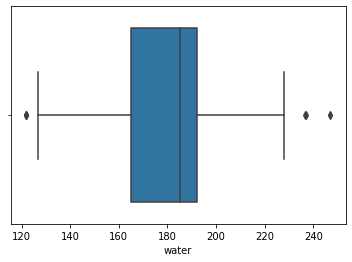

In [19]:
sns.boxplot(df['water'])

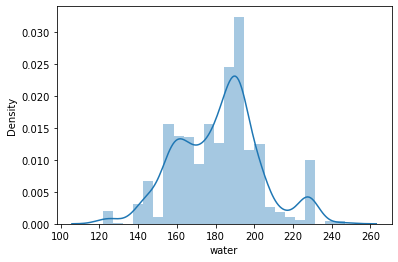

In [20]:
# distplot of water
sns.distplot(df['water']);
plt.show()

**Slag**

In [21]:
s_q1=df['slag'].quantile(q=0.25)
s_q3=df['slag'].quantile(q=0.75)
print('1st Quarile (Q1) is', s_q1)
print('3rd Quarile (Q3) is', s_q3)
print('Interquatile range (IQR) is', stats.iqr(df['slag']))


1st Quarile (Q1) is 0.0
3rd Quarile (Q3) is 142.95
Interquatile range (IQR) is 142.95


In [22]:
# Outlier detection from Interquatile Range (IQR) in original data

SL_outliers = s_q1-1.5*(s_q3-s_q1)
SU_outliers = s_q3+1.5*(s_q3-s_q1)
print('Lower outliers limit in slag', SL_outliers)
print('Upper outliers limit in slag', SU_outliers)

Lower outliers limit in slag -214.42499999999998
Upper outliers limit in slag 357.375


In [23]:
# Checking for presence of outliers with the upper and lower limits

print('Number of outliers in slag upper', df[df['slag']>SU_outliers]['slag'].count())
print('Number of outliers in slag upper', df[df['slag']<SL_outliers]['slag'].count())
print('% of outlier in slag upper', round(df[df['slag']>SU_outliers]['slag'].count()*100/len(df)))
print('% of outlier in slag lower', round(df[df['slag']<SL_outliers]['slag'].count()*100/len(df)))


Number of outliers in slag upper 2
Number of outliers in slag upper 0
% of outlier in slag upper 0
% of outlier in slag lower 0


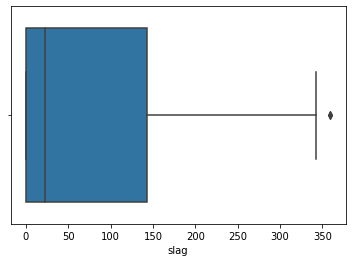

In [24]:
sns.boxplot(df['slag'])

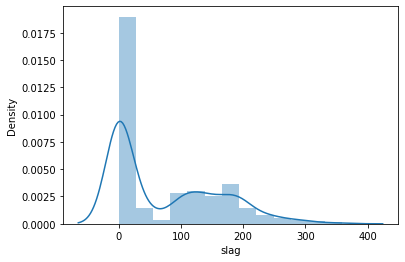

In [25]:
sns.distplot(df['slag'])

**Age**

In [26]:
a_q1=df['age'].quantile(q=0.25)
a_q3=df['age'].quantile(q=0.75)
print('1st Quarile (Q1) is', a_q1)
print('3rd Quarile (Q3) is', a_q3)
print('Interquatile range (IQR) is', stats.iqr(df['age']))


1st Quarile (Q1) is 7.0
3rd Quarile (Q3) is 56.0
Interquatile range (IQR) is 49.0


In [27]:
# Outlier detection from Interquatile Range (IQR) in original data

AL_outliers = a_q1-1.5*(a_q3-a_q1)
AU_outliers = a_q3+1.5*(a_q3-a_q1)
print('Lower outliers limit in age', AL_outliers)
print('Upper outliers limit in age', AU_outliers)

Lower outliers limit in age -66.5
Upper outliers limit in age 129.5


In [28]:
# Checking for presence of outliers with the upper and lower limits

print('Number of outliers in age upper', df[df['age']>AU_outliers]['age'].count())
print('Number of outliers in age  upper', df[df['age']<AL_outliers]['age'].count())
print('% of outlier in age upper', round(df[df['age']>AU_outliers]['age'].count()*100/len(df)))
print('% of outlier in age lower', round(df[df['age']<AL_outliers]['age'].count()*100/len(df)))


Number of outliers in age upper 59
Number of outliers in age  upper 0
% of outlier in age upper 6
% of outlier in age lower 0


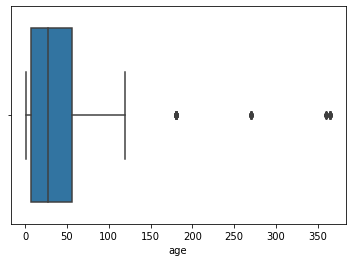

In [29]:
sns.boxplot(df['age'])

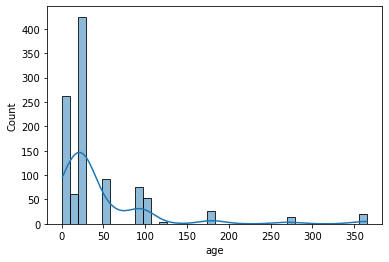

In [30]:
sns.histplot(df['age'], kde=True)

**Ash**

In [31]:
as_q1=df['ash'].quantile(q=0.25)
as_q3=df['ash'].quantile(q=0.75)
print('1st Quarile (Q1) is', as_q1)
print('3rd Quarile (Q3) is', as_q3)
print('Interquatile range (IQR) is', stats.iqr(df['ash']))


1st Quarile (Q1) is 0.0
3rd Quarile (Q3) is 118.3
Interquatile range (IQR) is 118.3


In [ ]:
# Outlier detection from Interquatile Range (IQR) in original data

ASL_outliers = as_q1-1.5*(as_q3-a_q1)
ASU_outliers = as_q3+1.5*(as_q3-a_q1)
print('Lower outliers limit in age', ASL_outliers)
print('Upper outliers limit in age', ASU_outliers)

Lower outliers limit in age -166.95
Upper outliers limit in age 285.25


In [ ]:
# Checking for presence of outliers with the upper and lower limits

print('Number of outliers in ash upper', df[df['ash']>ASU_outliers]['ash'].count())
print('Number of outliers in ash  upper', df[df['age']<ASL_outliers]['ash'].count())
print('% of outlier in ash upper', round(df[df['ash']>ASU_outliers]['ash'].count()*100/len(df)))
print('% of outlier in ash lower', round(df[df['ash']<ASL_outliers]['ash'].count()*100/len(df)))


Number of outliers in ash upper 0
Number of outliers in ash  upper 0
% of outlier in ash upper 0
% of outlier in ash lower 0


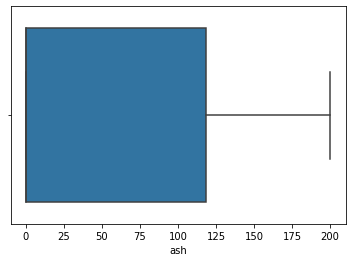

In [32]:
sns.boxplot(df['ash'])

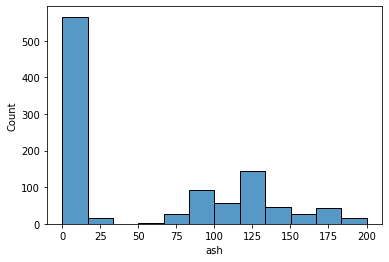

In [33]:
sns.histplot(df['ash'])

### Mutlivariate Analysis

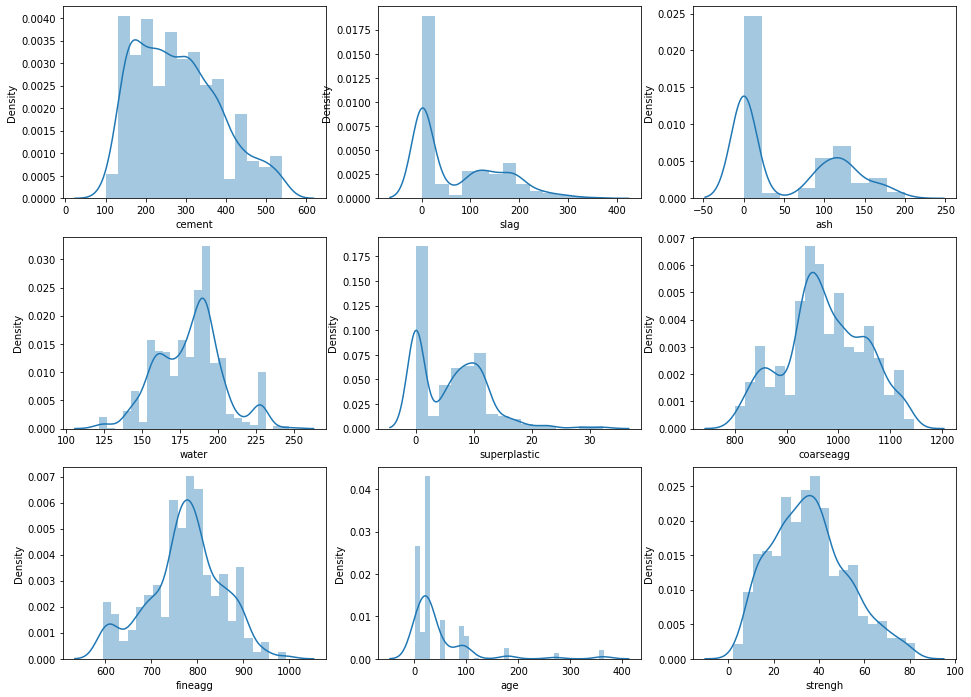

In [34]:
fig, ax2 = plt.subplots(3,3,figsize=(16,12))
sns.distplot(df['cement'], ax=ax2[0][0])
sns.distplot(df['slag'], ax=ax2[0][1])
sns.distplot(df['ash'], ax=ax2[0][2])
sns.distplot(df['water'], ax=ax2[1][0])
sns.distplot(df['superplastic'], ax=ax2[1][1])
sns.distplot(df['coarseagg'], ax=ax2[1][2])
sns.distplot(df['fineagg'], ax=ax2[2][0])
sns.distplot(df['age'], ax=ax2[2][1])
sns.distplot(df['strengh'], ax=ax2[2][2])
plt.show()

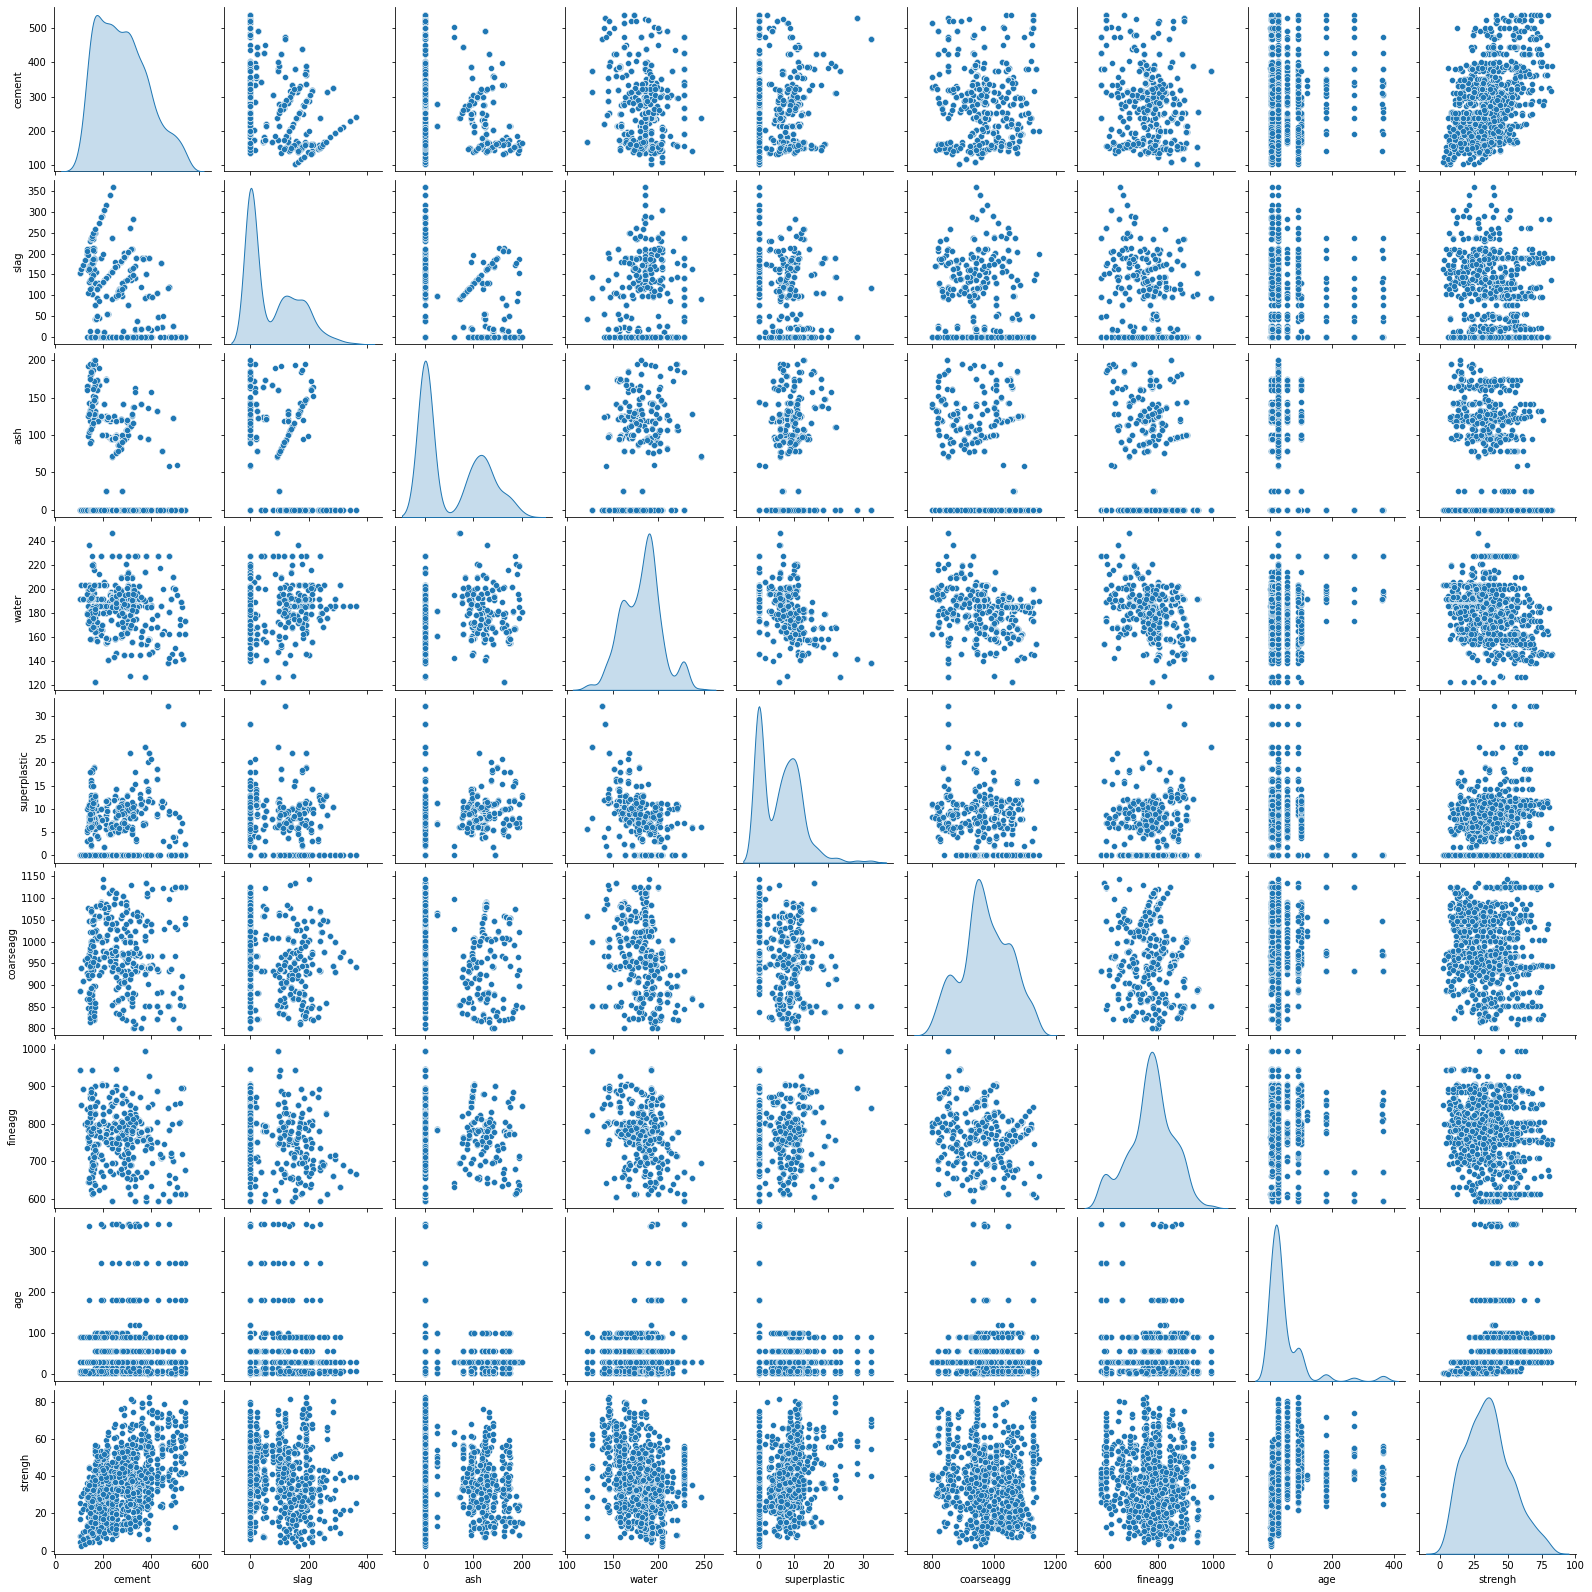

In [35]:
sns.pairplot(df, diag_kind='kde')

**Correlation between Variables**

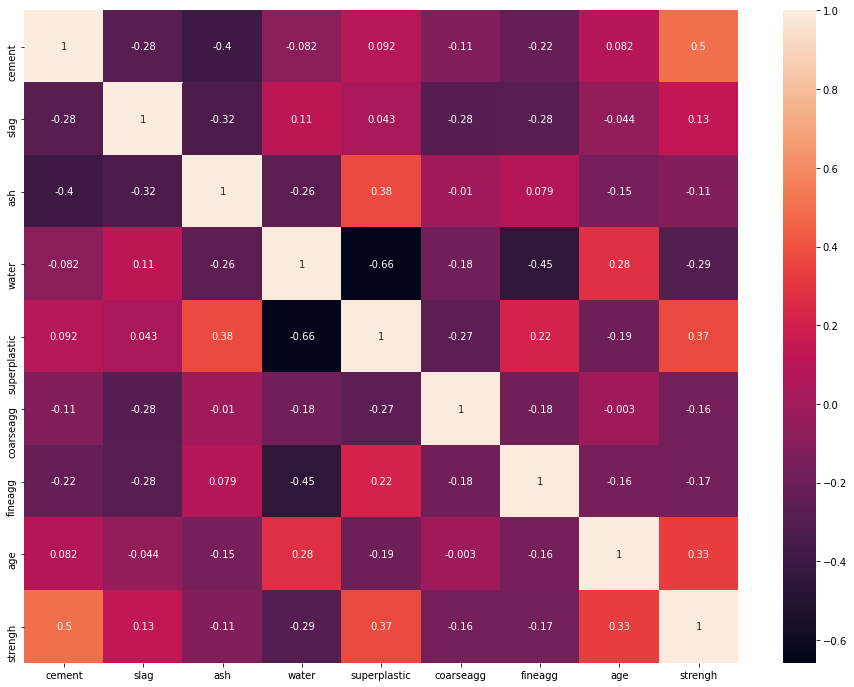

In [36]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True)


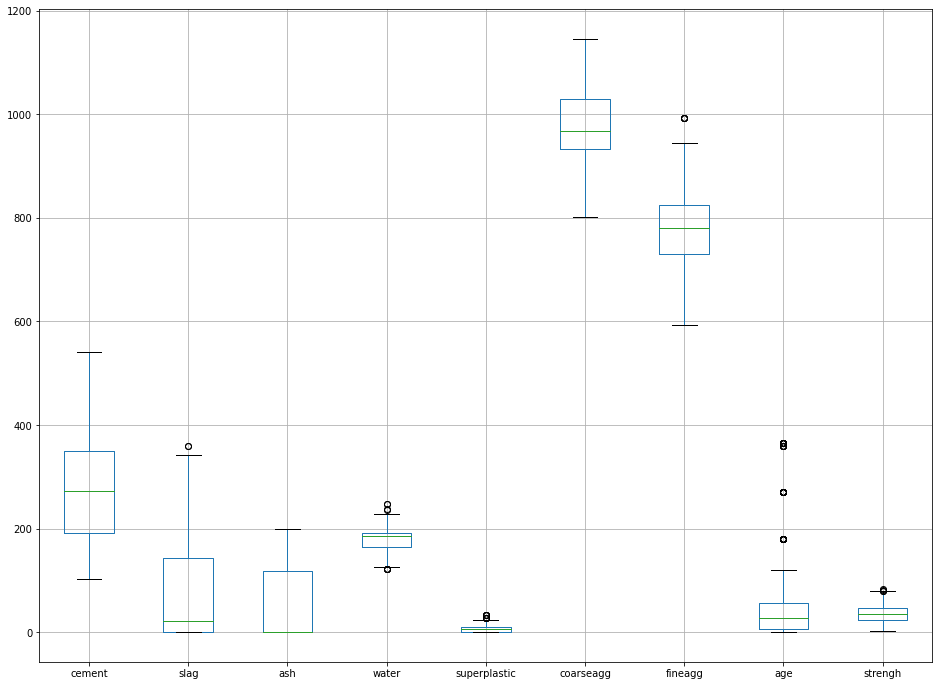

In [37]:
df.boxplot(figsize=(16,12))

**Replacing the ouliters by the median**

In [38]:
for cols in df.columns:
  q1=df[cols].quantile(0.25)
  q3=df[cols].quantile(0.75)
  iqr=q3-q1

  low = q1-1.5*iqr
  high= q3+1.5*iqr
  df.loc[(df[cols] < low) | (df[cols] > high), cols] =df[cols].median()


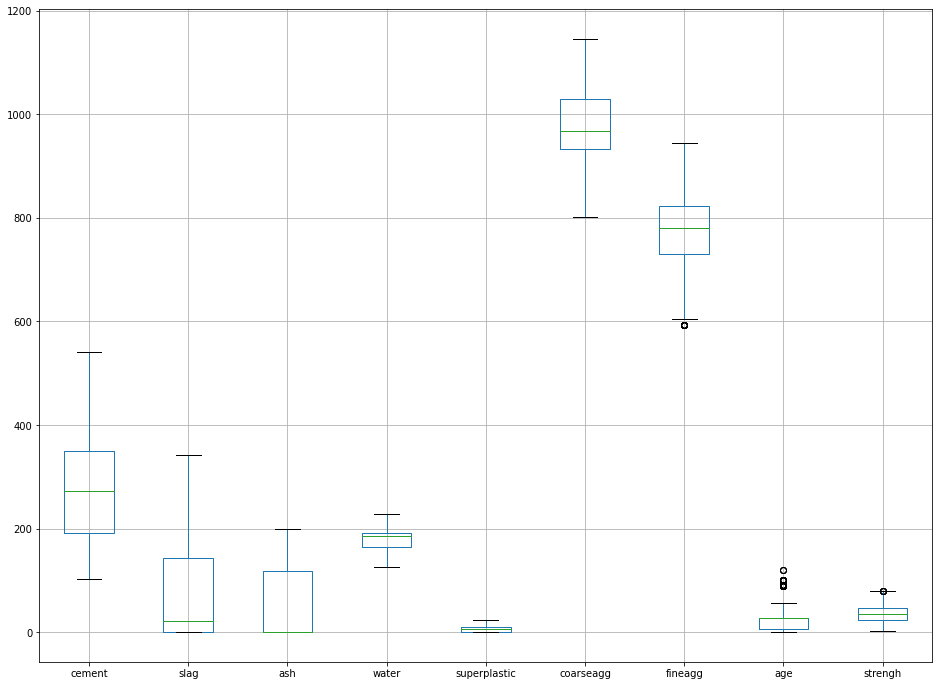

In [39]:
df.boxplot(figsize=(16,12))

**Feature Engineering and Model Building**

In [40]:
from sklearn.model_selection import train_test_split

X=df.drop('strengh', axis=1)
y=df['strengh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [41]:
X_train.shape , X_test.shape

((721, 8), (309, 8))

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.1595192 , -0.84087072,  0.98308595, ...,  0.63941989,
        -0.31087582, -1.04885675],
       [-0.40715291, -0.84087072,  0.61965596, ..., -0.29246914,
         0.89960798, -1.04885675],
       [-1.3477711 ,  0.76398276,  0.75788361, ..., -0.72581672,
        -0.317349  , -0.16673455],
       ...,
       [ 0.1595192 , -0.84087072,  0.98308595, ...,  0.63941989,
        -0.31087582, -0.16673455],
       [ 2.10403875, -0.84087072, -0.84182961, ...,  1.94585417,
        -2.12983812, -0.16673455],
       [ 0.31389181, -0.84087072,  0.91319557, ...,  0.3722528 ,
        -1.14979936, -0.16673455]])

**Random Forest Model**

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [44]:
# Model Performance on Training Data
rf_model.score(X_train, y_train)

0.9796936139526632

In [45]:
# Model Performance on Testing Data

rf_score = rf_model.score(X_test, y_test)
rf_score

0.8530008726533328

In [46]:
from sklearn.metrics import mean_squared_error
y_pred_rf = rf_model.predict(X_test)
mean_squared_error(y_test,y_pred_rf)

37.51280196431252

In [48]:
from sklearn.model_selection import cross_val_score, KFold
kcv = KFold(n_splits=10, shuffle=True)

print(cross_val_score(rf_model, X_train, y_train, cv=kcv).mean() )

0.8757422117893399


In [49]:
results = pd.DataFrame({'Algorithm':['Random Forest'], 'Score': rf_score})
results

,Algorithm,Score
0,Random Forest,0.853001


**Gradient Boosting Regressor**

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [51]:
gbr_model.score(X_train, y_train)

0.9428810860022911

In [52]:
gbr_score = gbr_model.score(X_test, y_test)
gbr_score

0.8445769639764279

In [53]:
y_pred_gbr = gbr_model.predict(X_test)

In [54]:
mean_squared_error(y_test, y_pred_gbr)

39.66250464395462

In [56]:
gbr_df = pd.DataFrame({'Algorithm':['Gradient Boosting Regressor'], 'Score': gbr_score})
results = pd.concat([results, gbr_df])
results

,Algorithm,Score
0,Random Forest,0.853001
0,Gradient Boosting Regressor,0.844577


**Ada Boosting Regressor**

In [57]:
from sklearn.ensemble import AdaBoostRegressor

In [58]:
ada_model = AdaBoostRegressor()
ada_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [59]:
ada_model.score(X_train, y_train)

0.7940965219202303

In [60]:
ada_score = ada_model.score(X_test, y_test)
ada_score

0.7196468908823053

In [61]:
y_pred_ada = ada_model.predict(X_test)
mean_squared_error(y_test, y_pred_ada)

71.54349044269897

In [62]:
y_pred_gbr = ada_model.predict(X_test)

In [63]:
ada_df = pd.DataFrame({'Algorithm':['Ada Boosting Regressor'], 'Score': ada_score})
results = pd.concat([results, ada_df])
results

,Algorithm,Score
0,Random Forest,0.853001
0,Gradient Boosting Regressor,0.844577
0,Ada Boosting Regressor,0.719647


**KNN Regressor**

In [64]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_model.score(X_train, y_train)


0.8022508591887447

In [65]:
knn_score = knn_model.score(X_test, y_test)
knn_score

0.5861759582523456

In [66]:
y_pred_knn = knn_model.predict(X_test)
mean_squared_error(y_test, y_pred_knn)

105.60402368608413

In [67]:
cross_val_score(knn_model, X_train, y_train, cv=kcv).mean()

0.6501372963170714

In [69]:
knn_df = pd.DataFrame({'Algorithm':['KNN Regressor'], 'Score': knn_score})
results = pd.concat([results, knn_df])
results

,Algorithm,Score
0,Random Forest,0.853001
0,Gradient Boosting Regressor,0.844577
0,Ada Boosting Regressor,0.719647
0,KNN Regressor,0.586176


**Bagging Regressor**

In [70]:
from sklearn.ensemble import BaggingRegressor

bag_model = BaggingRegressor()
bag_model.fit(X_train, y_train)
bag_model.score(X_train, y_train)

0.9704060933112432

In [71]:
bag_score = bag_model.score(X_test, y_test)
bag_score

0.8306519932861436

In [72]:
y_pred_bag = bag_model.predict(X_test)
mean_squared_error(y_test, y_pred_bag)

43.21602688107378

In [73]:
bag_df = pd.DataFrame({'Algorithm':['Bagging Regressor'], 'Score': bag_score})
results = pd.concat([results, bag_df])
results

,Algorithm,Score
0,Random Forest,0.853001
0,Gradient Boosting Regressor,0.844577
0,Ada Boosting Regressor,0.719647
0,KNN Regressor,0.586176
0,Bagging Regressor,0.830652


**Support Vector Regressor**

In [74]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
svr_model.score(X_train, y_train)

0.7266713958158313

In [76]:
svr_score = svr_model.score(X_test, y_test)
svr_score

0.6212210237366284

In [77]:
y_pred_svr = svr_model.predict(X_test)
mean_squared_error(y_test, y_pred_svr)

96.66085085868392

In [78]:
svr_df = pd.DataFrame({'Algorithm':['Support Vector Regressor'], 'Score': svr_score})
results = pd.concat([results, svr_df])
results

,Algorithm,Score
0,Random Forest,0.853001
0,Gradient Boosting Regressor,0.844577
0,Ada Boosting Regressor,0.719647
0,KNN Regressor,0.586176
0,Bagging Regressor,0.830652
0,Support Vector Regressor,0.621221


**XGBoost Regressor**

In [83]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

xgr_model =XGBRegressor()
xgr_model.fit(X_train, y_train)


[10:50:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [84]:
xgr_model.score(X_train, y_train)

0.9372801533152781

In [87]:
xgr_score = xgr_model.score(X_test, y_test)
xgr_score

0.8443127326756164

In [93]:
y_pred_xgr = xgr_model.predict(X_test)
mean_squared_error(y_test, y_pred_xgr)

39.72993399975439

In [88]:
xgr_df = pd.DataFrame({'Algorithm':['XGBoost Regressor'], 'Score': xgr_score})
results = pd.concat([results, xgr_df])
results

,Algorithm,Score
0,Random Forest,0.853001
0,Gradient Boosting Regressor,0.844577
0,Ada Boosting Regressor,0.719647
0,KNN Regressor,0.586176
0,Bagging Regressor,0.830652
0,Support Vector Regressor,0.621221
0,XGBoost Regressor,0.844313


**DecisionTree Model**

In [90]:
from sklearn.tree import DecisionTreeRegressor

dt_model =DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_model.score(X_train, y_train)

0.9928723514126692

In [92]:
dt_score = dt_model.score(X_test, y_test)
dt_score

0.7429977170590221

In [94]:
dt_df = pd.DataFrame({'Algorithm':['DecisionTree Regressor'], 'Score': dt_score})
results = pd.concat([results, dt_df])
results

,Algorithm,Score
0,Random Forest,0.853001
0,Gradient Boosting Regressor,0.844577
0,Ada Boosting Regressor,0.719647
0,KNN Regressor,0.586176
0,Bagging Regressor,0.830652
0,Support Vector Regressor,0.621221
0,XGBoost Regressor,0.844313
0,DecisionTree Regressor,0.742998


In [104]:
print("Feature importances \n ", pd.DataFrame(dt_model.feature_importances_, columns=['Importance'], index=X_train.columns))


Feature importances 
                Importance
cement          0.353314
slag            0.064772
ash             0.014306
water           0.135364
superplastic    0.017128
coarseagg       0.050443
fineagg         0.037805
age             0.326868


In [106]:
y_pred_dt = dt_model.predict(X_test)
mean_squared_error(y_test, y_pred_dt)

65.58457807443365

In [122]:
from scipy.stats import zscore
df2 = df.copy()
X2 = df2.drop(['strengh','ash','coarseagg','fineagg','slag','superplastic'], axis=1)
y2=df2['strengh']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1)

X_train2 = X_train2.apply(zscore)
X_test2 = X_test2.apply(zscore)

In [123]:
dt_new_model = DecisionTreeRegressor()
dt_new_model.fit(X_train2, y_train2)
dt_new_model.score(X_train2, y_train2)

0.9859576596535616

In [124]:
print("Feature importances \n ", pd.DataFrame(dt_new_model.feature_importances_, columns=['Importance'], index=X_train2.columns))


Feature importances 
          Importance
cement    0.454801
water     0.202901
age       0.342298


In [125]:
dt_new_model.score(X_test2, y_test2)

0.5123203239515368

In [126]:
results

,Algorithm,Score
0,Random Forest,0.853001
0,Gradient Boosting Regressor,0.844577
0,Ada Boosting Regressor,0.719647
0,KNN Regressor,0.586176
0,Bagging Regressor,0.830652
0,Support Vector Regressor,0.621221
0,XGBoost Regressor,0.844313
0,DecisionTree Regressor,0.742998
